In [101]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

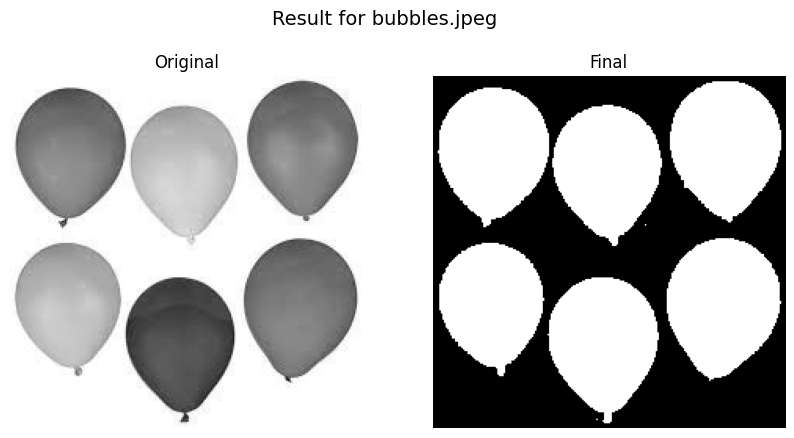

In [102]:
def show_side_by_side(title, img1, img2, label1="Original", label2="Final"):
    plt.figure(figsize=(10,5))

    # Left: original
    plt.subplot(1,2,1)
    plt.imshow(img1, cmap="gray")
    plt.title(label1)
    plt.axis("off")

    # Right: processed
    plt.subplot(1,2,2)
    plt.imshow(img2, cmap="gray")
    plt.title(label2)
    plt.axis("off")

    plt.suptitle(title, fontsize=14)
    plt.show()

def process_balloon(img_path):
    image = cv2.imread(img_path)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Keep only pixels with enough saturation (colored regions)
    lower = np.array([0, 40, 40])   
    upper = np.array([180, 255, 255])
    mask = cv2.inRange(hsv, lower, upper)

    # Apply morphological closing to fill gaps
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    mask_closed = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=1)

    return image, mask_closed

# Example run
img_path = "assets/bubbles.jpeg"
orig, final_mask = process_balloon(img_path)

# Convert original to grayscale for consistency with show_side_by_side
gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)

# Show only original vs final (like coins)
show_side_by_side(f"Result for {os.path.basename(img_path)}", gray, final_mask)


Processing assets/coins1.jpeg ...


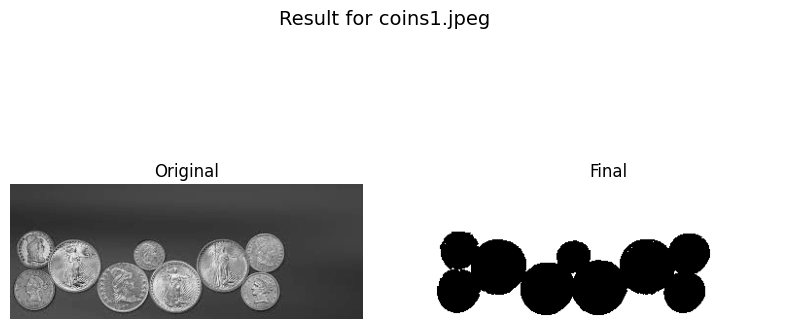

In [103]:
def show_side_by_side(title, img1, img2, label1="Original", label2="Final"):
    plt.figure(figsize=(10,5))

    # Left: original
    plt.subplot(1,2,1)
    plt.imshow(img1, cmap="gray")
    plt.title(label1)
    plt.axis("off")

    # Right: processed
    plt.subplot(1,2,2)
    plt.imshow(img2, cmap="gray")
    plt.title(label2)
    plt.axis("off")

    plt.suptitle(title, fontsize=14)
    plt.show()

images = [
    "assets/coins1.jpeg",
]

# Use 3x3 ellipse kernel for closing
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))

for img_path in images:
    print(f"\nProcessing {img_path} ...")

    image = cv2.imread(img_path)
    if image is None:
        print(f"⚠️ Could not load {img_path}")
        continue
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 1: Binary inversion (coins white, bg black)
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Step 2: Morphological selection (closing 3x3)
    final_mask = cv2.morphologyEx(binary, cv2.MORPH_ERODE, kernel, iterations=3)

    # Show only original vs final
    show_side_by_side(f"Result for {os.path.basename(img_path)}", gray, final_mask)



Processing assets/coins2.jpeg ...


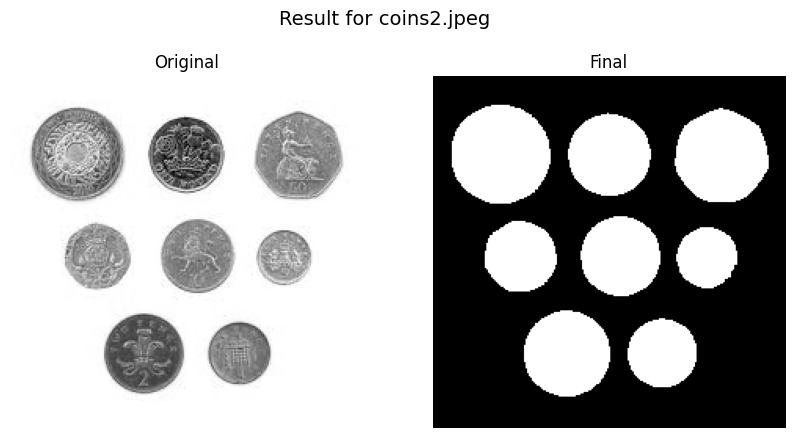


Processing assets/coins3.jpeg ...


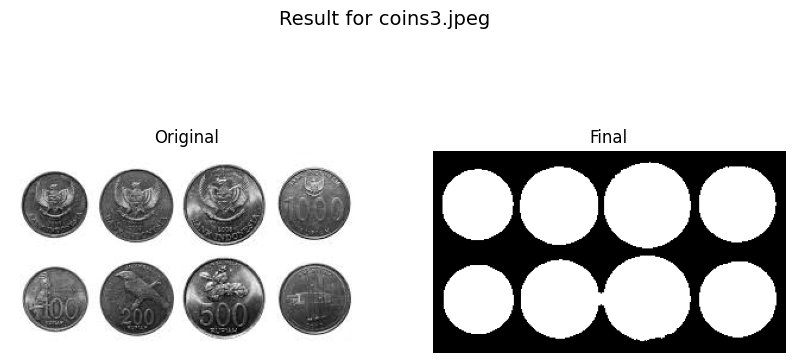


Processing assets/coins4.jpeg ...


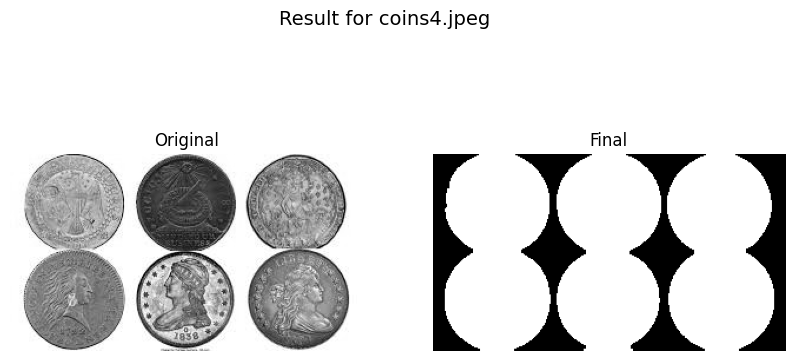

In [104]:
def show_side_by_side(title, img1, img2, label1="Original", label2="Final"):
    plt.figure(figsize=(10,5))

    # Left: original
    plt.subplot(1,2,1)
    plt.imshow(img1, cmap="gray")
    plt.title(label1)
    plt.axis("off")

    # Right: processed
    plt.subplot(1,2,2)
    plt.imshow(img2, cmap="gray")
    plt.title(label2)
    plt.axis("off")

    plt.suptitle(title, fontsize=14)
    plt.show()

images = [
    "assets/coins2.jpeg",
    "assets/coins3.jpeg",
    "assets/coins4.jpeg"
]

# Use 5x5 ellipse kernel (stronger shape preservation)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

for img_path in images:
    print(f"\nProcessing {img_path} ...")

    image = cv2.imread(img_path)
    if image is None:
        print(f"⚠️ Could not load {img_path}")
        continue
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 1: Binary inversion (coins white, bg black)
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Step 2: Morphological selection (dilation + erosion)
    dilated = cv2.dilate(binary, kernel, iterations=2)
    eroded = cv2.erode(dilated, kernel, iterations=1)

    # Final mask (white coins, black bg)
    final_mask = eroded  

    # Show only original vs final
    show_side_by_side(f"Result for {os.path.basename(img_path)}", gray, final_mask)
